In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import math

In [42]:
l = [
('003427', 191, 102, 202, 113), 
('003188', 185, 102, 200, 113), 
('001119', 301, 100, 323, 110), 
('003619', 190, 103, 204, 119), 
('003195', 186,  99, 200, 109), 
('003441', 189, 103, 205, 111), 
('002902', 178, 103, 197, 114), 
('003178', 186, 103, 219, 114), 
('003081', 184, 102, 197, 111), 
('003031', 182, 103, 203, 114), 
('000832', 289, 103, 315, 117), 
('003895', 184, 104, 197, 112), 
('000286', 301, 102, 307, 113), 
('001661', 295, 102, 325, 113), 
('003382', 204, 102, 227, 113), 
('003111', 181, 102, 202, 113), 
('002943', 188, 102, 199, 113), 
('004080', 178, 102, 202, 113), 
('003260', 186, 102, 198, 113), 
('004308', 187, 102, 204, 113), 
('003106', 187, 102, 196, 113), 
('003134', 180, 102, 203, 113), 
('003797', 185, 102, 199, 113), 
('003475', 181, 102, 199, 113), 
('003481', 181, 102, 199, 113), 
('003984', 184, 102, 202, 113), 
('004250', 196, 102, 202, 113), 
('003435', 196, 102, 202, 113), 
('003144', 183, 102, 198, 113), 
('003854', 183, 102, 198, 113), 
('003805', 183, 102, 195, 113), 
('002834', 171, 102, 199, 113), 
('003165', 184, 102, 202, 113), 
('004233', 178, 102, 201, 113), 
('002877', 185, 102, 197, 113), 
('003422', 188, 102, 200, 113), 
('000281', 302, 102, 314, 113), 
('003228', 188, 102, 204, 113), 
('002839', 188, 102, 204, 113), 
('002002', 285, 102, 316, 113), 
('003716', 193, 102, 209, 113), 
('003015', 187, 102, 206, 113), 
('003818', 187, 102, 206, 113), 
('003945', 182, 102, 201, 113), 
('003609', 182, 102, 201, 113), 
('004030', 182, 102, 201, 113), 
('003303', 182, 102, 201, 113), 
('003942', 182, 102, 201, 113), 
('003317', 178, 102, 210, 113), 
('000861', 286, 102, 323, 113), 
('002927', 185, 102, 197, 113), 
('003958', 177, 102, 203, 113), 
('003961', 187, 102, 207, 113), 
('004300', 187, 102, 196, 113), 
('004240', 187, 102, 196, 113), 
('004035', 187, 102, 196, 113), 
('002914', 187, 102, 196, 113), 
('004011', 187, 102, 196, 113), 
('003433', 187, 102, 196, 113), 
('004044', 184, 102, 202, 113), 
('003354', 184, 102, 202, 113), 
('002937', 184, 102, 202, 113), 
('001813', 294, 102, 323, 113), 
('002970', 186, 102, 205, 113), 
('004082', 185, 102, 200, 113), 
('003777', 177, 102, 202, 113), 
('003759', 175, 102, 194, 113), 
('003825', 175, 102, 194, 113)
]

In [40]:
class fusenet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv11 = nn.Conv2d(1, 64, 5, 2, 1)
        self.conv21 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv22 = nn.Conv2d(128, 128, 3, 2, 1)
        self.conv31 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv32 = nn.Conv2d(256, 256, 3, 2, 1)
        self.conv41 = nn.Conv2d(256, 512, 3, 1, 1)
        self.conv42 = nn.Conv2d(512, 512, 3, 2, 1)
        self.conv51 = nn.Conv2d(512, 512, 3, 1, 1)

        self.ap = nn.AvgPool2d(5)
        self.aap = nn.AdaptiveAvgPool2d(1)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(512, 4)

    def forward(self, x):
        x = self.relu(self.conv11(x))
        x = self.relu(self.conv21(x))
        x = self.relu(self.conv22(x))
        x = self.relu(self.conv31(x))
        x = self.relu(self.conv32(x))
        x = self.relu(self.conv41(x))
        x = self.relu(self.conv42(x))
        x = self.relu(self.conv51(self.ap(x)))
        x = self.flatten(self.aap(x))
        x = self.relu(self.fc(x))
        return x

net = fusenet()
net(torch.zeros(1, 1, 1280, 720)).shape

torch.Size([1, 4])

200.80701754385964
227 194
5.703184705887903


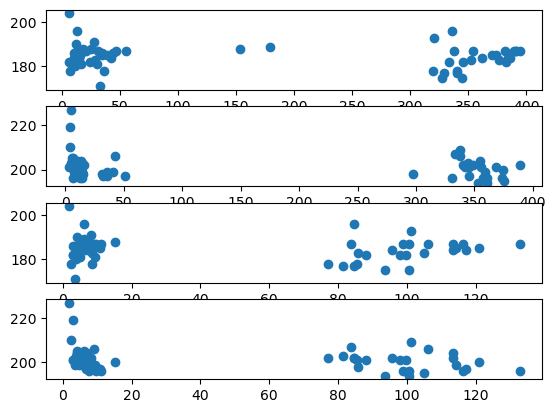

In [84]:
ay, cy, cca, ccc = [], [], [], []

for e in l:
    id = e[0]
    path_rgb = "files/img_raw/rgb/" + id + "_rgb.png"
    path_nir = "files/img_raw/nir/" + id + "_nir.png"
    path_dpt = "files/img_raw/dpt/" + id + "_dpt.png"
    rgb = cv2.imread(path_rgb)
    if rgb.shape != (720, 1280, 3):
        continue
    rgb = cv2.resize(rgb, (1280, 720))
    nir = cv2.resize(cv2.imread(path_nir), (1280, 720))
    dpt = cv2.resize(cv2.imread(path_dpt), (1280, 720))
    a, c = np.mean(dpt[:, :80]) + np.max(dpt[:, :1200]), np.mean(dpt[:, 1180:]) + np.max(dpt[:, 1180:])
    cc = np.mean(dpt)

    ay.append((a, e[1]))
    cy.append((c, e[3]))
    cca.append((cc, e[1]))
    ccc.append((cc, e[3]))
    
fig, ax = plt.subplots(4)
ax[0].scatter([e[0] for e in ay], [e[1] for e in ay])
ax[1].scatter([e[0] for e in cy], [e[1] for e in cy])

ax[2].scatter([e[0] for e in cca], [e[1] for e in cca])
ax[3].scatter([e[0] for e in ccc], [e[1] for e in ccc])

count, a_mean = 0, 0
amin, amax = 1000, -1000
std = 0
for e in cy:
    std += math.pow(e[1] - 200, 2)
    if e[0] > 4:
        if e[1] > amax:
            amax = e[1]
        if e[1] < amin:
            amin = e[1]
        a_mean += e[1]
        count += 1
std = math.sqrt(std/count)
print(a_mean/count)
print(amax, amin)
print(std)

#ay -> inf: mean 184 std 8 min-max 12
# and for 480p mean 295 std 6.5 min-max 9

#cy -> inf: 200 std 8 min-max 8
# and for 480p mean 316 std 6.5 min-max 9

In [29]:
for e in l:
    path_rgb = "files/img_raw/rgb/" + e[0] + "_rgb.png"
    path_nir = "files/img_raw/nir/" + e[0] + "_nir.png"
    path_dpt = "files/img_raw/dpt/" + e[0] + "_dpt.png"
    rgb = cv2.resize(cv2.imread(path_rgb), (1280, 720))
    nir = cv2.resize(cv2.imread(path_nir), (1280, 720))
    dpt = cv2.resize(cv2.imread(path_dpt), (1280, 720))


    a, c = np.mean(dpt[:, :320]), np.mean(dpt[:, 960:])
    a_bdr, c_bdr = int(177 + 30/(a - 2.5)), 1280 - int(196 + 30/(c - 1.5))
    nir_ = cv2.resize(nir[102:607, a_bdr:c_bdr], (1280, 720))
    
    print(a_bdr, c_bdr)
    cv2.imshow("rgb", rgb)
    cv2.imshow("nir", nir_)
    if cv2.waitKey(0) == 27:
        cv2.destroyAllWindows()

102 607 180 1079
102 607 184 1078
102 607 179 1002
102 607 195 1075
102 607 180 1078
102 607 180 1064
102 607 195 1083
102 607 193 1022
102 607 186 1081
102 607 182 1049
102 607 246 1075
